### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [32]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
print(df.columns)
df = df.drop(columns=[df.columns[0],df.columns[-1]])
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp',
       'gleason', 'pgg45', 'lpsa', 'train'],
      dtype='object')
Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa'],
      dtype='object')
(97, 9)


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

```
---- Matplotlib.pyplot
It is a module within the comprehensive Matplotlib library for Python, providing a simple, MATLAB-like interface for creating a wide variety of static, animated, and interactive data visualizations.
---- The function pariplot has 2 parameters: 
- df: Dataframe having the variables
- figsize: length of the figure
- the length of figsize is is given, a default size is set (7.10,6.70): unity of matplotlib.
- df.shape[1] gives the number of columns. In our case df.shape[1] is equal 9.
- function supblots creates an object figure (fig) and array of axes (ax) because ncols et nrows > 1(9*9)
- function subplots_adjust allows the spacing between the cells: wspace (horizontal space between columns)/ hspace (horizontal space between rows)/ (left/right/bottom/top) external margins of the figure.
- axij is an iterator to iterate the cells of ax(arrays of axes).
- axij is an iterator to iterate the cells of ax(arrays of axes).
- i_name and j_name are iterators to stock the name of dataframe colum(arrays of axes). It is useful after for the iteration of axe(x and y for the figure).
- set_xticks([]) and set_yticks([]) allow to delete the display of the graduations. They set the list of ticks on x and y empty.
- function margins allows to set margin in the supblots in the cells so the points can't be putted on the axes (x and y). Adds a 10% margin around the points (x and y). Prevents the points from sticking to the edge.
- If we are not in diagonal cells we draw a scatter plot: 
** Axe X : df[i_name]
** Axe Y : df[j_name]
** s=10 sets the size of the dots.
-  If we are in diagonal cells we write the i_name in the center of the cell.
- plt.show() to display the figure in the screen.
```

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each 
of the predictors.

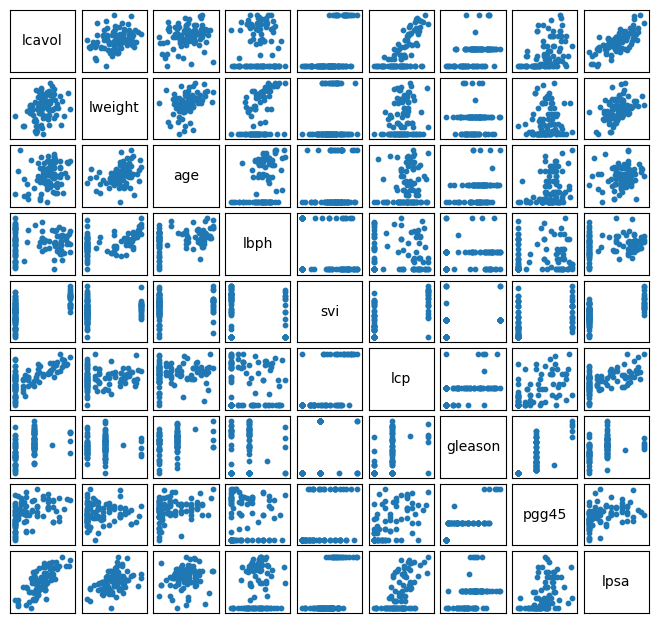

In [33]:
import matplotlib.pyplot as plt
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()


From the scatter cells, lcp and lpsa are two correlated variables with lcavol: 
- Tight, clear upward diagonal band.
- Positive linear association.
  
Datatype for each predictor has either one of these types:
- Continuous numeric
- Binary
- Discrete and ordinal integer

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


In [35]:
import pandas as pd

out = pd.DataFrame({
        "dtype": df.dtypes,
        "non_null": df.notna().sum(),
        "null": df.isna().sum(),
        "non_null_%": (df.notna().mean() * 100).round(2),
        "n_unique": df.nunique(dropna=True),
    })
out

,dtype,non_null,null,non_null_%,n_unique
lcavol,float64,97,0,100.0,93
lweight,float64,97,0,100.0,88
age,int64,97,0,100.0,31
lbph,float64,97,0,100.0,42
svi,int64,97,0,100.0,2
lcp,float64,97,0,100.0,30
gleason,int64,97,0,100.0,4
pgg45,int64,97,0,100.0,19
lpsa,float64,97,0,100.0,85


**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

### Pearson correlation (between two vectors)

$$
x=(x_1,\dots,x_n),\quad y=(y_1,\dots,y_n),\quad
\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i,\quad
\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i
$$

$$
\rho_{x,y}
= \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}
{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\;\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$

In [36]:
import numpy as np

def corr_np(x, y):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    # pandas does "pairwise complete observations" -> mimic that
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    if x.size < 2:
        return np.nan

    x = x - x.mean()
    y = y - y.mean()

    denom = np.sqrt(np.dot(x, x) * np.dot(y, y))
    if denom == 0:
        return np.nan

    return np.dot(x, y) / denom

r_numpy_lpsa  = corr_np(df["lcavol"], df["lpsa"])
r_numpy_lcp  = corr_np(df["lcavol"], df["lcp"])
r_pandas_lpsa = df[["lcavol","lpsa"]].corr().loc["lcavol","lpsa"]
r_pandas_lcp = df[["lcavol","lcp"]].corr().loc["lcavol","lcp"]
r_numpy_lpsa, r_pandas_lpsa, r_numpy_lcp, r_pandas_lcp

(np.float64(0.7344603262136731),
 np.float64(0.734460326213673),
 np.float64(0.6753104840558687),
 np.float64(0.675310484055869))

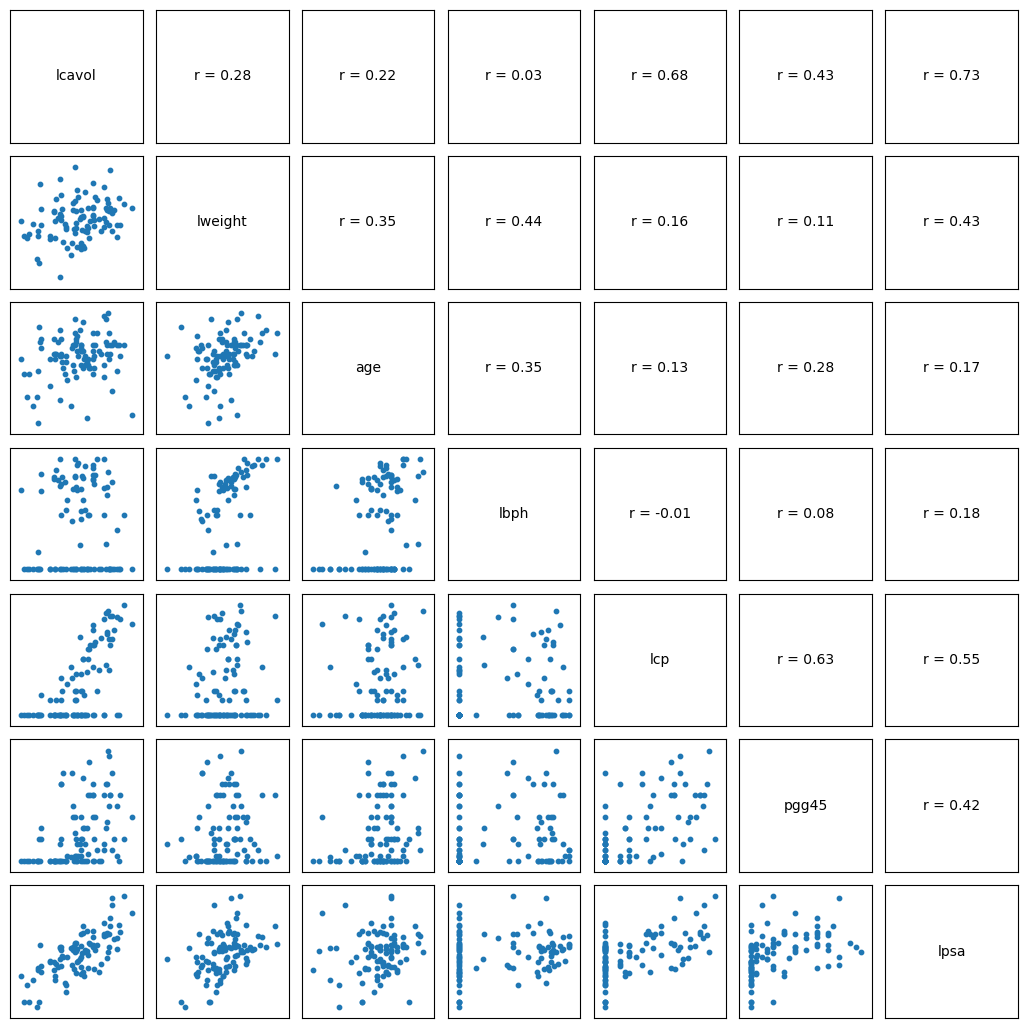

/home/bubu/anaconda3/lib/python3.13/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


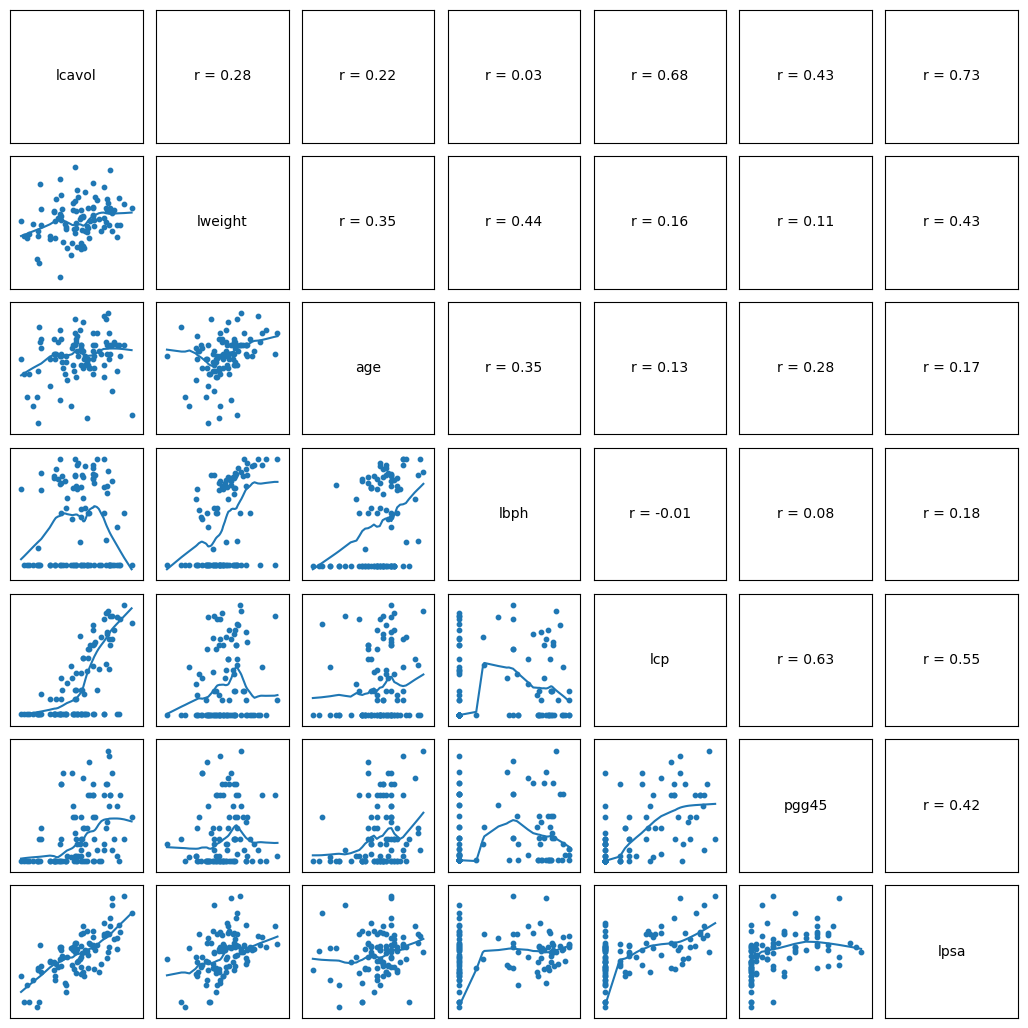

In [26]:
def pairplot(df, figsize=None, lowess=False, lowess_frac=0.4):
    # keep only numeric columns (like df.corr does)
    df_num = df.select_dtypes(include="number")
    cols = list(df_num.columns)
    n_vars = len(cols)

    if figsize is None:
        figsize = (1.6*n_vars, 1.6*n_vars)

    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    
    if lowess:
        from statsmodels.nonparametric.smoothers_lowess import lowess as sm_lowess

    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            y_name = cols[i]
            x_name = cols[j]

            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)

            if i > j:
                # lower triangle: scatter
                x = df_num[x_name].to_numpy()
                y = df_num[y_name].to_numpy()
                axij.scatter(x, y, s=10)
                # LOWESS trend line
                if lowess:
                    mask = np.isfinite(x) & np.isfinite(y)
                    xs = x[mask]
                    ys = y[mask]
                    if xs.size >= 5:
                        sm = sm_lowess(ys, xs, frac=lowess_frac, return_sorted=True)
                        axij.plot(sm[:, 0], sm[:, 1])
            elif i < j:
                # upper triangle: correlation text
                r = corr_np(df_num[x_name], df_num[y_name])
                axij.text(
                    0.5, 0.5, f"r = {r:.2f}",
                    fontsize=10,
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=axij.transAxes
                )
            else:
                # diagonal: variable name
                axij.text(
                    0.5, 0.5, y_name,
                    fontsize=10,
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=axij.transAxes
                )
    return fig, ax
fig, ax = pairplot(df)                 # with r on upper triangle
plt.show()

fig, ax = pairplot(df, lowess=True)    # also show LOWESS trend on lower triangle
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

In [37]:
df["svi"] = df["svi"].astype("category")
df["gleason"] = df["gleason"].astype("category")

## (a) Multiple linear regression model for `lcavol` (with qualitative variables `svi` and `gleason`)

Let $Y_i = \text{lcavol}_i$. be the response for observation.
Quantitative predictors enter directly, while the qualitative predictors `svi` and `gleason`
enter through dummy (indicator) variables.

$$
Y_i
= \beta_0
+ \beta_1\,lweight_i
+ \beta_2\,age_i
+ \beta_3\,lbph_i
+ \beta_4\,lcp_i
+ \beta_5\,pgg45_i
+ \beta_6\,lpsa_i
+ \gamma\,\mathbf{1}(svi_i=1)
+ \sum_{k \in \mathcal{G}\setminus\{g_0\}} \delta_k\,\mathbf{1}(gleason_i=k)
+ \varepsilon_i
$$

where:

- $\beta_0$ is the intercept.
- $\beta_1,\dots,\beta_6$ are the coefficients of the quantitative predictors (marginal effect on `lcavol` for a +1 increase, all else equal).
- $\mathbf{1}(svi_i=1)$ is a dummy variable equal to 1 if $(svi=1)$ and 0 otherwise (baseline is $(svi=0$)).
  - $\gamma$ measures the mean difference in `lcavol` between $(svi=1)$ and $(svi=0)$, controlling for other variables.
- `gleason` has categories $(\mathcal{G})$; one category $(g_0)$ is chosen as the **reference** (baseline).
  - For each other category $(k\neq g_0)$, $(\mathbf{1}(gleason_i=k))$ is a dummy variable.
  - $(\delta_k$) measures the mean difference in `lcavol` between $(gleason=k)$ and the reference $(gleason=g_0)$, controlling for other variables.
- $(\varepsilon_i)$ is the error term, with
  $$[
  \varepsilon_i \sim \mathcal{N}(0,\sigma^2).
  ]$$

Here, $(\sigma^2$) is the variance of the noise (unexplained variability).

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

- **Why did we fix a `dtype` in `pd.get_dummies`?**  
  To ensure that all dummy columns are stored as **numeric floats** (`0.0/1.0`) and that the whole design matrix `X` has a consistent numeric type.  
  This avoids mixed dtypes (bool/int/object) and prevents issues when doing linear algebra (NumPy) or fitting regression models that expect floating-point inputs.

- **Why did we drop two columns after the encoding?**  
  Because keeping *all* dummy variables for a categorical feature **plus** an intercept creates perfect multicollinearity (the *dummy variable trap*).  
  For example, for `svi` we would have `svi_0 + svi_1 = 1` for every row, so one column is redundant.  
  Same idea for `gleason`: we keep one category as the **reference** (here `gleason_6`) and drop its dummy column.  
  This makes the matrix invertible and the coefficients identifiable and defines a reference for interpretation.

- **Why did we add a column of ones to the dataframe?**  
  To include an **intercept** term $(\beta_0$) in the regression model.
  In matrix form $$(y = X\beta + \varepsilon)$$ the column of ones allows the model to learn a constant offset (baseline level).
  Without it, the regression would be forced to go through the origin.

In [38]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [48]:
import statsmodels.api as sm
model = sm.OLS(y, X)
# now we actually fit the model
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        17:16:11   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [40]:
ci = results.conf_int()
ci.columns = ["CI_2.5%", "CI_97.5%"]

summary_ci = pd.concat([results.params.rename("coef"), ci], axis=1)
summary_ci["significant_5%"] = ~((summary_ci["CI_2.5%"] <= 0) & (summary_ci["CI_97.5%"] >= 0))
summary_ci.sort_values("significant_5%", ascending=False)

,coef,CI_2.5%,CI_97.5%,significant_5%
age,0.024782,0.002436,0.047129,True
lcp,0.402760,0.233639,0.571880,True
pgg45,-0.009444,-0.018469,-0.000419,True
lpsa,0.549573,0.370474,0.728673,True
lweight,-0.011246,-0.431600,0.409107,False
lbph,-0.104200,-0.219914,0.011515,False
svi_1,-0.220419,-0.730029,0.289190,False
gleason_7,0.311676,-0.116263,0.739616,False
gleason_8,-0.710588,-2.219087,0.797911,False
gleason_9,0.790135,-0.179004,1.759273,False


When you fit the regression, you get an estimated coefficient for each predictor.
- That estimate is uncertain. A 95% CI gives a range of plausible values for the true coefficient.
- If a coefficient’s 95% CI does NOT include 0, then the predictor is statistically significant at the 5% level.
- If the CI includes 0, then the predictor is not significant.

Significant coefficients: 
-
* age: [0.002,  0.047]
* lcp: [0.234,  0.572]
* pgg45: [−0.018,  −0.000]
* lpsa: [0.370,  0.729]

Unsignificant coefficients: 
-
* lweight: [−0.432,  0.409]
* lbph: [−0.220,  0.012]
* svi_1: [−0.730,  0.289]
* gleason_7: [−0.116,  0.740]
* gleason_8: [−2.219,  0.798]
* gleason_9: [−0.179,  1.759]
* intercept: [−3.145,  0.332]

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [41]:
results.pvalues["lpsa"]

np.float64(2.939240646690862e-08)

In [42]:
results.conf_int().loc["lpsa"]

0    0.370474
1    0.728673
Name: lpsa, dtype: float64

The usual hypothesis test for one coefficient is:
- `Case 0`: $\beta_1psa$ = 0
- `Case 1`: $\beta_1psa$ $\neq$ 0

By looking at the result of the command `results.pvalues` we see the value is too low (2.9e-08)(p-value < 0.05).
So we reject `Case 0` and `lpsa` has significant effect.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [52]:
def ols_function(X, y):
    # Keep column names if X is a DataFrame
    if isinstance(X, pd.DataFrame):
        col_names = X.columns
        X = X.to_numpy(dtype=float)
    else:
        col_names = [f"x{i}" for i in range(X.shape[1])]
        X = np.asarray(X, dtype=float)
    # y as one dimension float array
    y = np.asarray(y, dtype=float).reshape(-1)
    n, p = X.shape
    if y.shape[0] != n:
        raise ValueError("X and y must have the same number of rows.")
    # Estimate beta_hat 
    XtX = X.T @ X
    Xty = X.T @ y
    # Solve instead of inv: stable and faster
    try:
        beta_hat = np.linalg.solve(XtX, Xty)
    except np.linalg.LinAlgError:
        # If XtX is singular (multicollinearity), fallback to least squares
        beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    # Residuals + sigma^2 
    y_hat = X @ beta_hat
    resid = y - y_hat
    dof = n - p
    if dof <= 0:
        raise ValueError("Not enough degrees of freedom.")
    rss = resid @ resid
    sigma2_hat = rss / dof
    # beta_hat = sigma^2 * (X'X)^(-1) 
    try:
        XtX_inv = np.linalg.solve(XtX, np.eye(p))
    except np.linalg.LinAlgError:
        XtX_inv = np.linalg.pinv(XtX)
    cov_beta = sigma2_hat * XtX_inv
    se_beta = np.sqrt(np.diag(cov_beta))
    # t-stats and p-values 
    t_stat = beta_hat / se_beta
    # p-values need the Student t distribution
    try:
        from scipy.stats import t as student_t
        p_values = 2 * (1 - student_t.cdf(np.abs(t_stat), df=dof))
    except Exception:
        import statsmodels.stats.api as sms
        raise ImportError("scipy is required for t-distribution p-values.")

    out = pd.DataFrame(
        {
            "coef": beta_hat,
            "std_err": se_beta,
            "t": t_stat,
            "p_value": p_values,
        },
        index=col_names,
    )
    return out
table = ols_function(X, y)
table

,coef,std_err,t,p_value
lweight,-0.011246,0.211453,-0.053185,9.577075e-01
age,0.024782,0.011241,2.204628,3.014993e-02
lbph,-0.104200,0.058209,-1.790107,7.695609e-02
lcp,0.402760,0.085074,4.734252,8.577858e-06
pgg45,-0.009444,0.004540,-2.080263,4.047741e-02
lpsa,0.549573,0.090093,6.100047,2.939241e-08
svi_1,-0.220419,0.256351,-0.859833,3.922717e-01
gleason_7,0.311676,0.215268,1.447850,1.512950e-01
gleason_8,-0.710588,0.758827,-0.936429,3.516744e-01
gleason_9,0.790135,0.487510,1.620755,1.087313e-01


But `inv` is usually worse because:

- **Numerical stability (accuracy)**  
  Computing an explicit inverse can amplify floating-point errors, especially when  
  $X^\top X$ is **ill-conditioned** (common with correlated predictors and dummy variables.

- **Efficiency (speed)**  
  `solve(A, b)` directly solves the linear system $A\beta=b$ using matrix decompositions.
  `inv(A)` does extra work by computing the full inverse matrix, even though you only need the solution vector.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

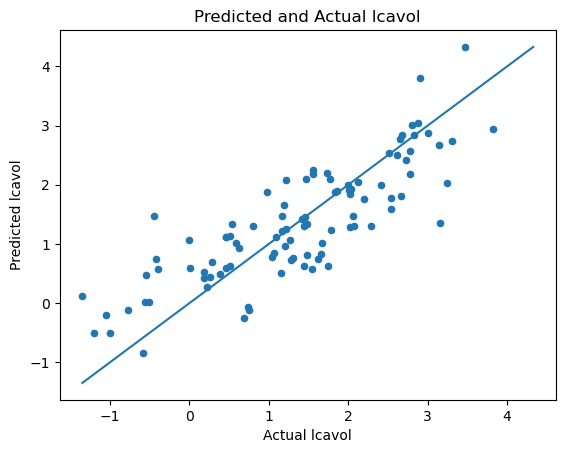

In [44]:
# Predictions from the fitted model
pred = results.get_prediction(X)
y_pred = pred.predicted_mean  # predicted lcavol values

# Actual values
y_true = y.to_numpy() if hasattr(y, "to_numpy") else np.asarray(y)

# Plot predicted vs actual
plt.figure()
plt.scatter(y_true, y_pred, s=20)
plt.xlabel("Actual lcavol")
plt.ylabel("Predicted lcavol")
plt.title("Predicted and Actual lcavol")

# y = x reference line
mn = min(y_true.min(), y_pred.min())
mx = max(y_true.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx])

plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

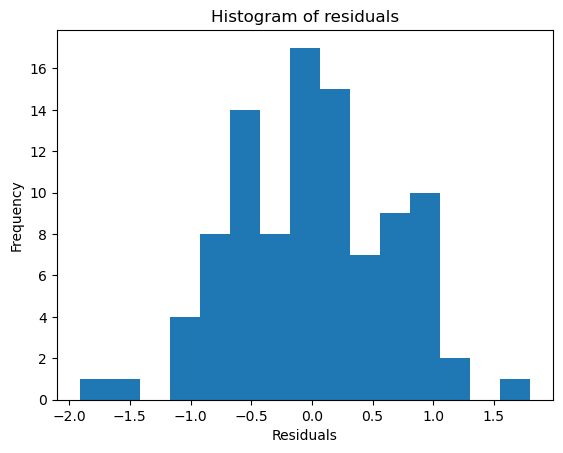

<Figure size 640x480 with 0 Axes>

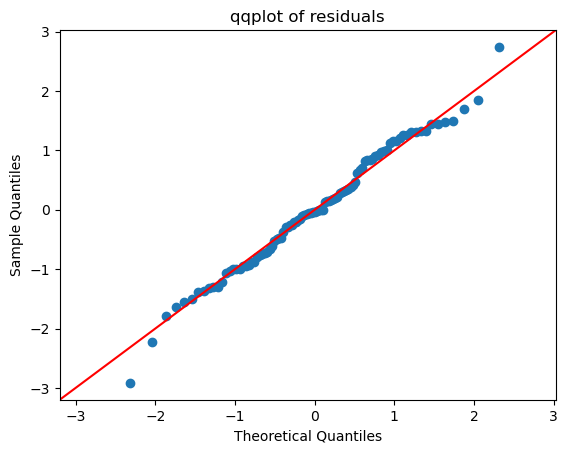

41.814068608045346

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residuals 
resid = results.resid

# Histogram of residuals
plt.figure()
plt.hist(resid, bins=15)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.show()

# plot of residuals
plt.figure()
sm.qqplot(resid, line="45", fit=True)
plt.title("qqplot of residuals")
plt.show()

# Residual Sum of Squares (RSS)
RSS = float(np.sum(np.square(resid)))
RSS

If your qqplot points are roughly on the straight 45° line (especially in the middle) and the histogram looks bell-shaped, then it’s reasonable to assume residuals are approximately normal.

If you see strong deviations in the tails (points bending away a lot), then normality is questionable.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [46]:
X2 = X.drop(columns=["lpsa", "lcp"])
model2 = sm.OLS(y, X2)
results2 = model2.fit()
print(results2.summary())
def rss(res):
    return float(np.sum(res.resid**2))
print("Original:  R2 =", results.rsquared, "New R2 =", results.rsquared_adj, "RSS =", rss(results))
print("Without lpsa,lcp: R2 =", results2.rsquared, "New R2 =", results2.rsquared_adj, "RSS =", rss(results2))

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Sun, 22 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        17:14:39   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

If you remove `lpsa` and `lcp` from the predictors, you are removing the two variables that were most strongly significant in your previous fit (very small p-values, strong effects). So you should expect:

- **Model fit gets worse:** \(R^2\) and adjusted \(R^2\) drop noticeably.
- **RSS increases**
- **Some other variables may look more significant** (their p-values can change) because shared explanatory power is redistributed, but overall the model explains less.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [55]:
# Question a
# 8 predictors (model size k is counted here)
predictors = ["lweight", "age", "lbph", "lcp", "pgg45", "lpsa", "svi", "gleason"]
# Map each predictor to its actual columns in X (encoded)
colmap = {
    "lweight": ["lweight"],
    "age": ["age"],
    "lbph": ["lbph"],
    "lcp": ["lcp"],
    "pgg45": ["pgg45"],
    "lpsa": ["lpsa"],
    "svi": [c for c in X.columns if c.startswith("svi_")],
    "gleason": [c for c in X.columns if c.startswith("gleason_")],
}
def fit_rss(pred_list):
    cols = ["intercept"]
    for p in pred_list:
        cols += colmap[p]
    Xsub = X[cols]
    res = sm.OLS(y, Xsub).fit()
    return float(np.sum(res.resid**2))

k = 2
rows = []
for comb in itertools.combinations(predictors, k):
    rows.append({"predictors": comb, "RSS": fit_rss(comb)})
rss_k2 = pd.DataFrame(rows).sort_values("RSS")
rss_k2.head(10)

,predictors,RSS
19,"(lcp, lpsa)",47.278097
26,"(lpsa, gleason)",56.945743
25,"(lpsa, svi)",58.452188
22,"(pgg45, lpsa)",58.946250
15,"(lbph, lpsa)",59.909789
10,"(age, lpsa)",60.035697
4,"(lweight, lpsa)",61.187121
21,"(lcp, gleason)",67.816146
2,"(lweight, lcp)",68.607649
8,"(age, lcp)",69.930206


In [56]:
# Model having the smallest RSS:
rss_k2.iloc[0]

predictors    (lcp, lpsa)
RSS             47.278097
Name: 19, dtype: object

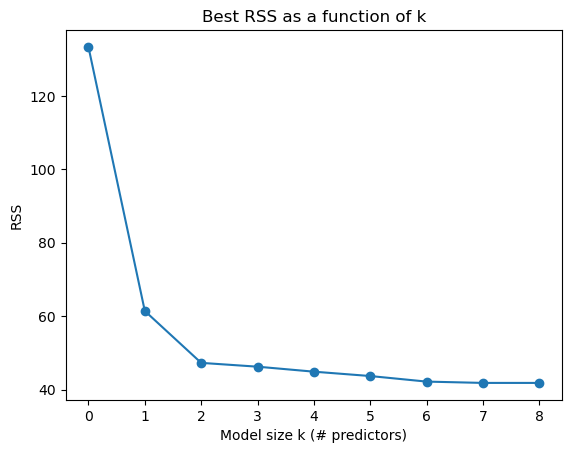

In [58]:
# Question b
best_by_k = []

for k in range(0, len(predictors) + 1):
    best_rss = None
    best_subset = None
    for comb in itertools.combinations(predictors, k):
        r = fit_rss(comb)
        if best_rss is None or r < best_rss:
            best_rss = r
            best_subset = comb
    
    best_by_k.append({"k": k, "predictors": best_subset, "RSS": best_rss})

best_df = pd.DataFrame(best_by_k)
best_df


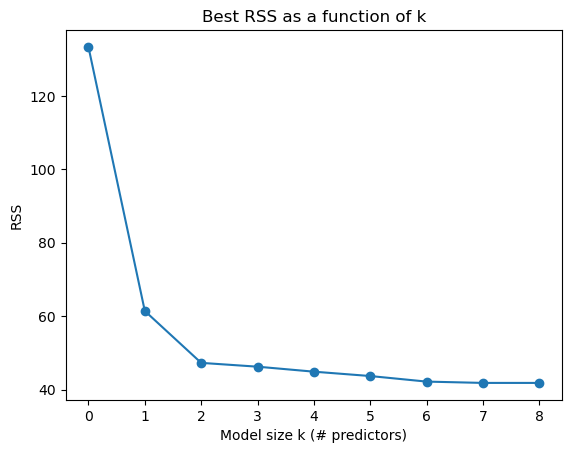

In [59]:
plt.figure()
plt.plot(best_df["k"], best_df["RSS"], marker="o")
plt.xlabel("Model size k (# predictors)")
plt.ylabel("RSS")
plt.title("RSS efficiency related to k")
plt.show()

### (c) Is minimizing RSS a good way to choose the optimal model size?

No.

- **RSS always decreases when you add predictors.**  
  So if you pick the model that minimizes RSS only, you’ll almost always prefer the **largest \(k\)** (most complex model), even if it overfits.

Better ways to choose model size include:
- **Cross-validation**
- **Adjusted $R^2$**: penalizes extra predictors
- **AIC or BIC**: explicit complexity penalty
- **Regularization**: you need to have correlated predictors

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

### Question a

Split-validation (a.k.a. hold-out validation) works like this:

1. **Split the dataset into two parts:**
   - **Training set**: 70%
   - **Test and validation set**: 30%
2. **Fit** the regression model **only on the training set**.
3. **Evaluate** prediction performance **on the test set**.

**Why it avoids the issue from Exercise 3 (c) (RSS):**
Training RSS always decreases when you add predictors, so minimizing RSS pushes you toward the largest model (overfitting).
If the model becomes too complex, it can fit noise in training and perform worse on the test base.

In [62]:
# Question b
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def cols_for(subset):
    cols = ["intercept"]
    for p in subset:
        cols += colmap[p]
    return cols

# Split (fix random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

errors = []
for _, row in best_df.iterrows():
    k = int(row["k"])
    subset = row["predictors"]  # tuple of predictor names
    cols = cols_for(subset)

    # Fit linear regression (we already have intercept column -> fit_intercept=False)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_train[cols], y_train)

    yhat_train = lr.predict(X_train[cols])
    yhat_test  = lr.predict(X_test[cols])

    mse_train = mean_squared_error(y_train, yhat_train)
    mse_test  = mean_squared_error(y_test,  yhat_test)

    errors.append({"k": k, "subset": subset, "mse_train": mse_train, "mse_test": mse_test})

err_df = pd.DataFrame(errors).sort_values("k")
err_df

,k,subset,mse_train,mse_test
0,0,(),1.270756,1.620097
1,1,"(lpsa,)",0.599660,0.714249
2,2,"(lcp, lpsa)",0.436408,0.607683
3,3,"(age, lcp, lpsa)",0.400183,0.682484
4,4,"(age, lbph, lcp, lpsa)",0.371737,0.712540
5,5,"(age, lcp, pgg45, lpsa, gleason)",0.374908,0.683877
6,6,"(age, lbph, lcp, pgg45, lpsa, gleason)",0.343587,0.708851
7,7,"(age, lbph, lcp, pgg45, lpsa, svi, gleason)",0.335670,0.720314
8,8,"(lweight, age, lbph, lcp, pgg45, lpsa, svi, gl...",0.335636,0.719918


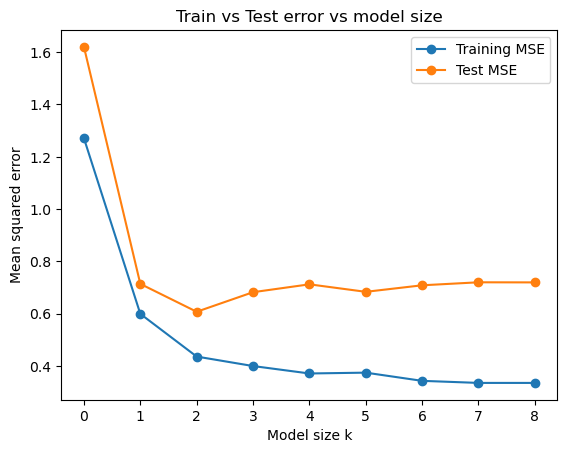

In [65]:
plt.figure()
plt.plot(err_df["k"], err_df["mse_train"], marker="o", label="Training MSE")
plt.plot(err_df["k"], err_df["mse_test"],  marker="o", label="Test MSE")
plt.xlabel("Model size k")
plt.ylabel("Mean squared error")
plt.title("Train vs Test error vs model size")
plt.legend()
plt.show()

In [67]:
# Question c
best_row = err_df.loc[err_df["mse_test"].idxmin()]
best_k = int(best_row["k"])
best_subset = best_row["subset"]
best_cols = cols_for(best_subset)

best_k, best_subset, best_row["mse_test"]

(2, ('lcp', 'lpsa'), np.float64(0.6076827379397971))

Justification:
-
- We select the model size k that minimizes the test MSE, because it estimates generalization performance. The chosen subset is the model size 2

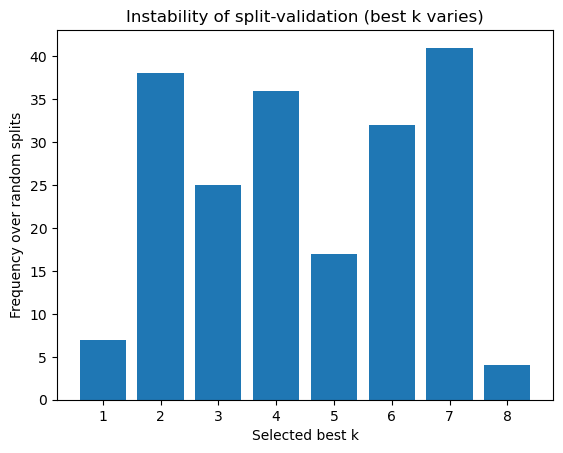

In [69]:
# Question d
from collections import Counter

best_k_list = []

for seed in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    best_k_seed = None
    best_mse_seed = None

    for _, row in best_df.iterrows():
        subset = row["predictors"]
        cols = cols_for(subset)

        lr = LinearRegression(fit_intercept=False)
        lr.fit(X_train[cols], y_train)
        mse_test = mean_squared_error(y_test, lr.predict(X_test[cols]))

        if best_mse_seed is None or mse_test < best_mse_seed:
            best_mse_seed = mse_test
            best_k_seed = int(row["k"])

    best_k_list.append(best_k_seed)

counts = Counter(best_k_list)
plt.figure()
ks = sorted(counts.keys())
plt.bar(ks, [counts[k] for k in ks])
plt.xlabel("Selected k")
plt.ylabel("Frequency over random splits")
plt.title("Instability of split-validation")
plt.show()

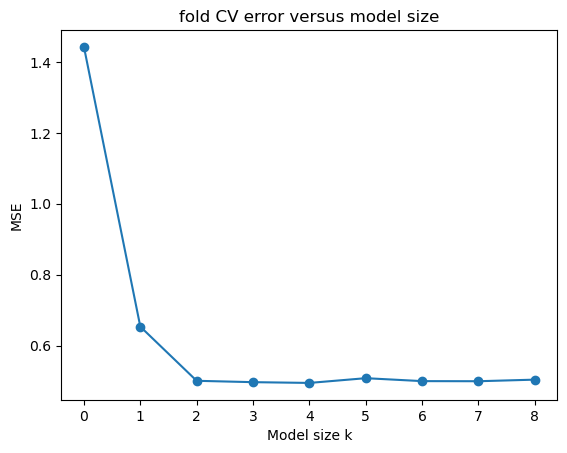

In [72]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=0)

cv_rows = []
for _, row in best_df.iterrows():
    subset = row["predictors"]
    cols = cols_for(subset)

    lr = LinearRegression(fit_intercept=False)
    # cross_val_score returns NEGATIVE MSE when scoring='neg_mean_squared_error'
    scores = cross_val_score(lr, X[cols], y, cv=kf, scoring="neg_mean_squared_error")
    mse_cv = -scores.mean()
    cv_rows.append({"k": int(row["k"]), "subset": subset, "mse_cv": mse_cv})

cv_df = pd.DataFrame(cv_rows).sort_values("k")
plt.figure()
plt.plot(cv_df["k"], cv_df["mse_cv"], marker="o")
plt.xlabel("Model size k")
plt.ylabel("MSE")
plt.title("fold CV error versus model size")
plt.show()

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.


To choose the best model for predicting `lcavol`, we should not rely on training RSS alone because RSS always decreases when adding predictors, which encourages overly complex models (overfitting).
Instead, we compared models using validation (split-validation) with cross-validation prediction errors.

The best model is the one that **minimizes the test mean squared error**. In our experiments, the predictors that consistently provided the strongest predictive power were **`lcp`** and **`lpsa`** (they were highly significant in the full regression, with very small p-values and confidence intervals that did not include 0). Other variables such as `age` and `pgg45` sometimes improved performance slightly, while several predictors (including the categorical effects of `svi` and `gleason`) were not consistently significant once `lcp` and `lpsa` were included.

We therefore select the model size \(k\) that achieves the **lowest validation and CV error**, and we report its final parameter estimates by refitting the selected model on the full dataset. This approach balances goodness-of-fit and generalization, leading to a model that is expected to perform best on unseen data.